## Importing all the necessary packages

In [1]:
#Importing all the necessary packages
#Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Preprocessing Libraries
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

#Importing Basic Libraries for Model Building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, cross_validate

#Importing Model Libraries for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgbm

from sklearn.tree import export_graphviz

#Importing other Libraries
import time

from os import system
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# Part - A

### 1. Data Understanding & Exploration: [5 Marks]

#### 1A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
TCC1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
TCC1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


#### 1B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [3]:
TCC2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
TCC2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [4]:
TCC = pd.merge(TCC1, TCC2, how='outer', on='customerID')
TCC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
TCC.to_csv('TCC.csv', index=False)

#### 1D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [6]:
if set(TCC1.columns).issubset(TCC.columns) & set(TCC2.columns).issubset(TCC.columns):
     print('All the columns from previous DataFrames "TCC1" & "TCC2" have been coorporated in "TCC" DataFrame')
else:
    print('Need to check again...!!!')

All the columns from previous DataFrames "TCC1" & "TCC2" have been coorporated in "TCC" DataFrame


### 2. Data Cleaning & Analysis: [15 Marks]

#### 2A. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [7]:
TCC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. Here it is visible that there are no null values present in the dataset.
2. We need to check once again after we convert all the continuous value variable to float type in next step.

In [8]:
#Converting the variable columns with continuous values to 'Float' type
def to_float(*col):
    for col in col:
        TCC[col] = pd.to_numeric(TCC[col], errors='coerce')
    print(TCC.info())

to_float('MonthlyCharges', 'TotalCharges')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. Here we can observe that after converting the datatypes of few features, null values are present which may have not been earlier due to their datatype. Hence it is essential to check presence of null values in dataframe.
2. But before proceeding to check the null values we can see that the 'SeniorCitizen' feature is a categorical variable, but it is in form of int datatype. Hence it needs to be converted to object datatype.

In [9]:
#All the feature have 'Yes', 'No', or other similar string value, hence it is good practice to change the values of
# 0 to No & 1 to Yes for 'SeniorCitizen' feature, alongwith changing its datatype.
TCC['SeniorCitizen'] = TCC['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}).astype(object)
TCC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#We need to check again for missing values after convertig data-types of some columns
null_set = pd.DataFrame({'Value': TCC.isnull().sum(), 'Percentage': TCC.isnull().sum()/len(TCC)})
null_set

,Value,Percentage
customerID,0,0.000000
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000


1. Here we can see that there are 11 null values which are much less than 1% of the dataset. Hence they can be removed instead of filling them by performing any operation.
2. Hence we drop these rows with null values.

In [11]:
TCC.dropna(axis=0, inplace=True)
TCC.reset_index(drop=True, inplace=True)
TCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Now, we proceed with this dataframe for further processing.

#### 2C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

In [12]:
def df_pie(df):
    cate_feat = []
    for cols in df.columns:
        if (df[cols].dtype == 'object' or df[cols].dtype == 'category') and (df[cols].nunique() <= 6): #Since here all the 
            # features are categorial variable except 'customerID', 'MonthlyCharges' , 'tenure' & 'TotalCharges', we select
            # all object & categorical datatype features. Further, To avoid 'customerID' to be considered as categorical 
            # variable, we set the limit that only 6 or less unique values of category is accepted for this pie-chart.
            cate_feat.append(cols)

    plt.figure(figsize=(15,15))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Pie-Charts for Categorial Variables', fontsize=18)
    
    ncols = 5
    nrows = len(cate_feat)//ncols + (len(cate_feat)%ncols > 0)
    
    for n, i in enumerate(cate_feat):
        ax = plt.subplot(nrows, ncols, n+1)
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%', ax=ax)
        ax.set_title(i.upper())
        ax.set_xlabel('')
        ax.set_ylabel('')

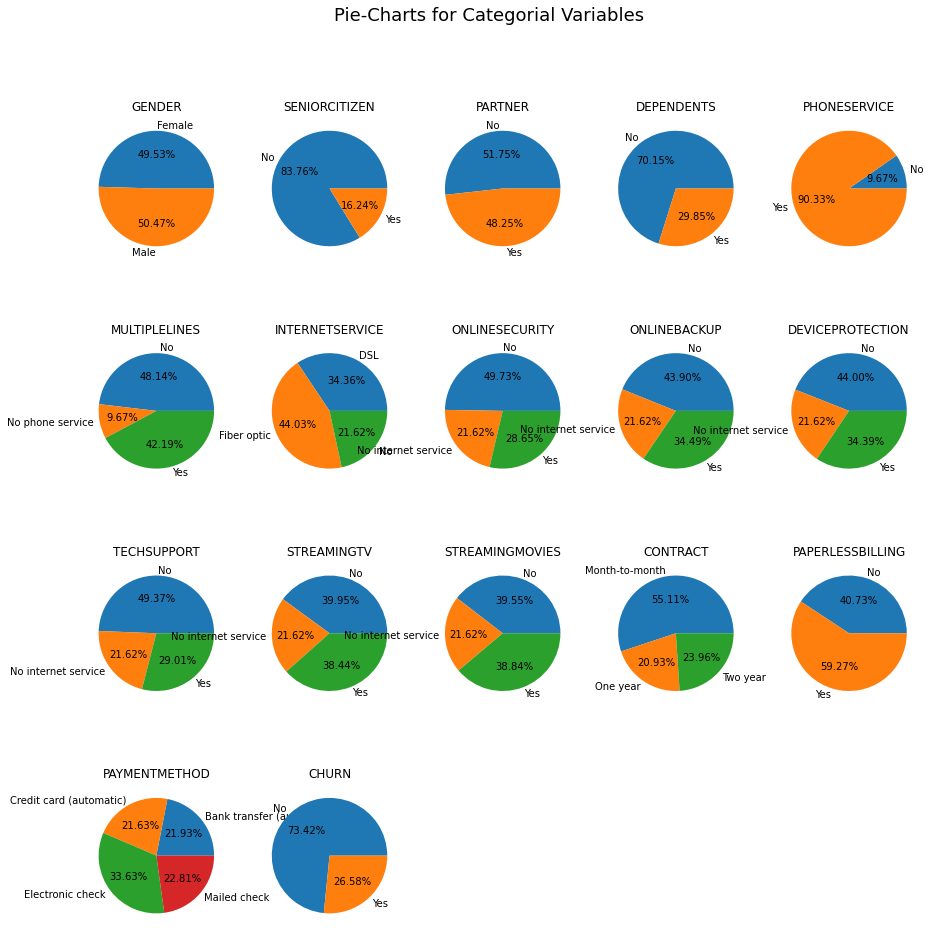

In [13]:
df_pie(TCC)

#### 2D. Share insights for Q2.c. [2 Marks]

1. For creating pie-chart on categorial variable is it essential that we select all the features which classify as category although we have not changed thier datatype to category.
2. To perform this, as mentioned above we set the criteria that the feature should not be 'float', as 'SeniorCitizen' although a categorical feature, it is represented as 'int'. We have not converted it to object type.
3. To avoid considering 'customerID' although it being 'object' datatype, it is not a categorical feature, hencce we set the limit for feature having on 6 or less unique values to be considered.
4. From the above figure it is visible that there are 7 features with 2 categories (including target variable - 'Churn'), 9 features with 3 categories and 1 feature 'PaymentMethod' with 4 categories.
5. The Male-Female Ratio seems almost equal. Similarly, people with or without partners are almost same.
6. There are more younger people than Senior Citizens. Also customers with dependent members are less.
7. Majority of the customers uses phone service.
8. Majority of the people do not prefer having multiplelines, online security, online backup, device protection, Tech-support.
9. Fiber optics seems to be more favourable choice for people as internet service.
10. People have almost equal interest in streamiing movies or TV.
11. Most of the people prefer paying of month-to-month basis. As people are aware about enviroment, lot more people are in favoure of paperlessbilling.
12. Even though all the payment methods are used almost equally, Electronic check are comparatively used more.

##### Further it seems that in 'No Phone Service' in 'Multiplelines' Feature has no significance, hence can be considered as 'No'. Similarly, 'No Internet Service' is aslo insignificant in 'Online Security', 'Online Backup', 'Device Protection', 'Techsupport' , 'StreamingMovies', 'StreamingTV'. Hence they can be changed to 'No'.

In [14]:
#Changing 'No Phone Service' in 'Multipleines' to No
#Changing 'No Internet Service' in 'Online Security', 'Online Backup', 'Device Protection', 'TechSupport', 'Streaming TV'
# & 'StreamingMovies' to 'No'.
TCC.replace(to_replace = ['No phone service', 'No internet service'], value = ['No', 'No'], inplace=True)

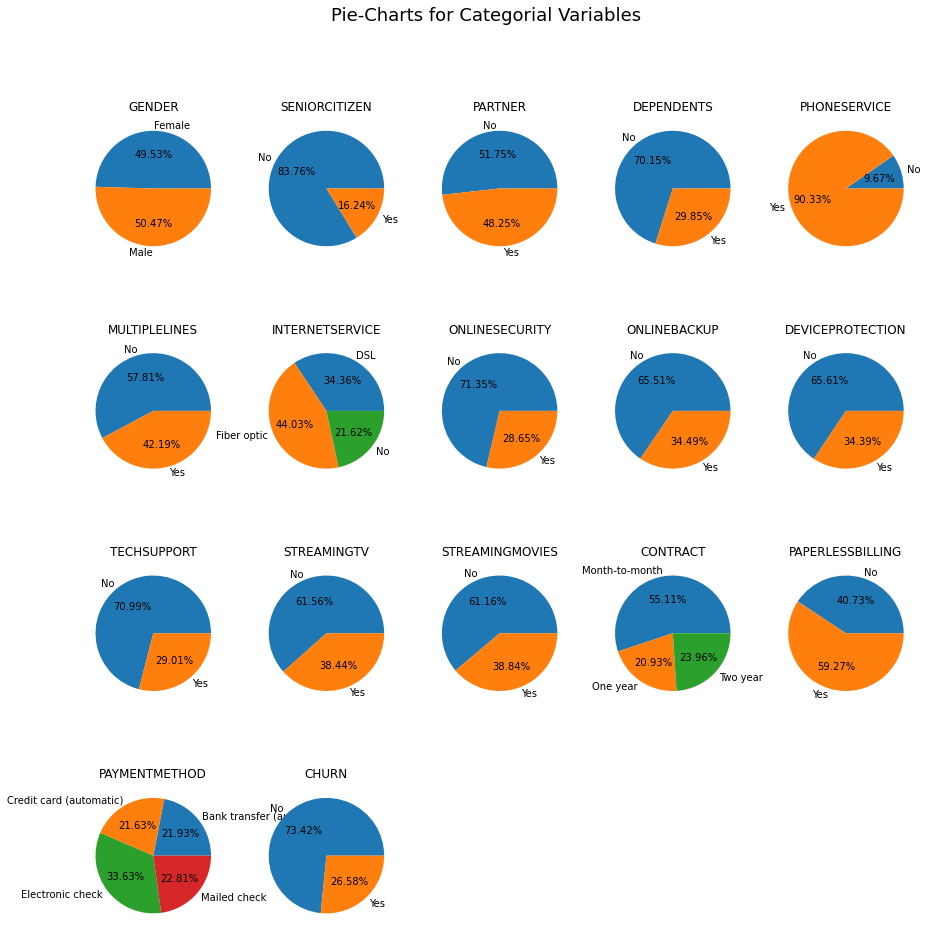

In [15]:
#Generating the pie-chart again to verify the revised data
df_pie(TCC)

#### 2E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [16]:
#Listing the Categorial Variable
cat_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling', 'PaymentMethod']

In [17]:
#Creating new dataframe to save dummies for Categorical Variables
Tcc = pd.get_dummies(TCC[cat_var])
Tcc.head()

#Adding balance Numerical Variables & Target Variable to this dataframe
Tcc[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']] = TCC[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

#Here we don't take 'customerID' feature into account as it is not an independent variable significant for prediction.

#Converting target variable'Churn' to numerical values
Tcc['Churn'] = Tcc['Churn'].map({'No':0, 'Yes':1})

Tcc.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,1


In [18]:
Tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7032 non-null   uint8  
 1   gender_Male                              7032 non-null   uint8  
 2   SeniorCitizen_No                         7032 non-null   uint8  
 3   SeniorCitizen_Yes                        7032 non-null   uint8  
 4   Partner_No                               7032 non-null   uint8  
 5   Partner_Yes                              7032 non-null   uint8  
 6   Dependents_No                            7032 non-null   uint8  
 7   Dependents_Yes                           7032 non-null   uint8  
 8   PhoneService_No                          7032 non-null   uint8  
 9   PhoneService_Yes                         7032 non-null   uint8  
 10  MultipleLines_No                         7032 no

##### Here we can see that all the features have been converted to numerical values. Hence we can proceed further to create our prediction model.

#### 2F. Split the data into 80% train and 20% test. [1 Marks]

Its better to normalise/standardize the data before spilitting it into train & test sets. So we'll split the data into train & test set after normalizing it.

In [19]:
#Splitting the dataset into dependent & target variables
x = Tcc.drop(['Churn'], axis=1)
y = Tcc['Churn']

#### 2G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [20]:
#Here all the categorical feature have been converted to dummy variable having values 0 & 1. Hence it is better to normalize 
#all the numerical columns with MinMax Scaler, which shall have values ranging from 0 to 1 & therefore all the variables 
#shall be either 0, 1 or between 0 & 1. 

Num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

mms = MinMaxScaler()

x[Num_cols] = mms.fit_transform(x[Num_cols])

In [21]:
#Now that we have normalized the data we split it into train & test set

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

### 3. Model building and Improvement: [10 Marks]

#### 3A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

Elapsed Duration (in seconds): 0.42733287811279297 

Base Model Accuracy for Training Dataset 0.9411555555555555
Base Model Accuracy for Testing Dataset 0.7803837953091685 

*************** Classification Report ***************
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407
 

*************** Confusion Matrix ***************


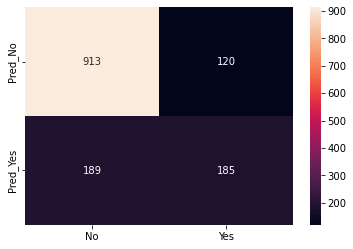

In [22]:
#Baseline XGB Model
t_start = time.time()

basexgb = xgb.XGBClassifier()

basexgb.fit(x_tr, y_tr)

#Predicting the values
base_pred = basexgb.predict(x_te)

t_end = time.time()

#Evaluating the Basemodel
print('Elapsed Duration (in seconds):', t_end - t_start, '\n')
print('Base Model Accuracy for Training Dataset', basexgb.score(x_tr, y_tr))
print('Base Model Accuracy for Testing Dataset', basexgb.score(x_te, y_te), '\n')
print('*'*15, 'Classification Report', '*'*15)
print(metrics.classification_report(y_te, base_pred), '\n')
print('*'*15, 'Confusion Matrix', '*'*15)
bxgb_cm = metrics.confusion_matrix(y_te, base_pred, labels=[0,1])
bxgb_cmdf = pd.DataFrame(bxgb_cm, columns=['No', 'Yes'], index=['Pred_No', 'Pred_Yes'])
sns.heatmap(bxgb_cmdf, annot=True, fmt='g');

In [23]:
#Printing the Parameters for BaseLine Model
print('BaseLine XGBoost Model Parameters')
basexgb.get_xgb_params()

BaseLine XGBoost Model Parameters


{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

#### 3B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]

In [24]:
#Performance Enhancement for XGBoost model with StratifiedKFold
start_time = time.time()

n_fold = 0

fold = StratifiedKFold(n_splits=10, shuffle=False)
for tr_index, val_index in fold.split(x_tr, y_tr):
    x_tr_st, x_val_st = x_tr.iloc[tr_index, :], x_tr.iloc[val_index, :]
    y_tr_st, y_val_st = y_tr.iloc[tr_index], y_tr.iloc[val_index]
    
    print('Stratified Fold:', n_fold, '\n')
    n_fold += 1
    
    xgboost = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 100, max_depth= 3, learning_rate= 0.01,
                           subsample = 0.8, early_stoppig_rounds = 15, eval_metric = 'auc', random_state=1)
    
    xgboost.fit(x_tr_st, y_tr_st, eval_set=[(x_tr_st, y_tr_st), (x_val_st, y_val_st)], verbose=5)
    
pred = xgboost.predict(x_te)

end_time = time.time()

Stratified Fold: 0 

[17:16:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stoppig_rounds" } are not used.

[0]	validation_0-auc:0.82761	validation_1-auc:0.81302
[5]	validation_0-auc:0.82958	validation_1-auc:0.81478
[10]	validation_0-auc:0.83413	validation_1-auc:0.81881
[15]	validation_0-auc:0.83433	validation_1-auc:0.81933
[20]	validation_0-auc:0.83552	validation_1-auc:0.82031
[25]	validation_0-auc:0.83982	validation_1-auc:0.82273
[30]	validation_0-auc:0.83985	validation_1-auc:0.82316
[35]	validation_0-auc:0.84019	validation_1-auc:0.82308
[40]	validation_0-auc:0.84399	validation_1-auc:0.82626
[45]	validation_0-auc:0.84448	validation_1-auc:0.82927
[50]	validation_0-auc:0.84559	validation_1-auc:0.83147
[55]	validation_0-auc:0.84622	validation_1-auc:0.83171
[60]	validation_0-auc:0.84740	validation_1-auc:0.83223
[65]	validation_0-auc:0.84729	validation_1-auc:0.83176
[

Elapsed Duration (in seconds): 4.528510808944702 

Enhanced Model Accuracy for Training Dataset 0.7976888888888889
Enhanced Model Accuracy for Testing Dataset 0.7853589196872779 

*************** Classification Report ***************
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1033
           1       0.67      0.39      0.49       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.76      1407
 

*************** Confusion Matrix ***************


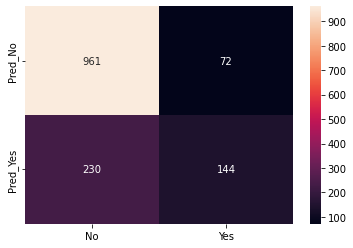

In [25]:
#Evaluating the model
print('Elapsed Duration (in seconds):', end_time - start_time, '\n')
print('Enhanced Model Accuracy for Training Dataset', xgboost.score(x_tr, y_tr))
print('Enhanced Model Accuracy for Testing Dataset', xgboost.score(x_te, y_te), '\n')
print('*'*15, 'Classification Report', '*'*15)
print(metrics.classification_report(y_te, pred), '\n')
print('*'*15, 'Confusion Matrix', '*'*15)
xg_cm = metrics.confusion_matrix(y_te, pred, labels=[0,1])
xg_cmdf = pd.DataFrame(xg_cm, columns=['No', 'Yes'], index=['Pred_No', 'Pred_Yes'])
sns.heatmap(xg_cmdf, annot=True, fmt='g');

In [26]:
#Printing the parameters for enhanced XGBoost Model
print('Enhanced XGBoost Model Parameters')
xgboost.get_xgb_params()

Enhanced XGBoost Model Parameters


{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'auc',
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.01,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'early_stoppig_rounds': 15}

# Part - B

In [27]:
# Loading the csv file & getting the info
def LoadFile(filename):
    global df
    df = pd.read_csv(filename)
    return

LoadFile('TCC.csv')

In [28]:
#Reading the Loaded CSV File
def readfile():
    global df
    print('The Details of file that is loaded is as follows: \n')
    print(df.info(), '\n')
    display(df)
    return

#readfile()

In [29]:
#Converting the numerical columns with object datatype to float datatype.
col1 = ['TotalCharges'] #The columns which should be Numeric type but are not, shall be converted to numeric type.
def to_numeric(col_1): #A1
    global df
    if col1 != []:
        for col in col_1:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        print('The Details after converting required columns to Numeric Datatype: \n')
        return df.info()
    else:
        print('No Columns to be converted to Numeric Datatype...!!!')

#to_numeric(col1)

In [30]:
#converting the object column with numeric datatype to object datatype
col2 = ['SeniorCitizen'] #The columns which should be Object type but are not, shall be converted to Object type.
def to_object(col_2): #A2
    global df
    if col2 != []:
        for col in col_2:
            df[col] = df[col].map({0: 'No', 1: 'Yes'})
            #df[col] = df[col].astype(object)
        print('\n')
        print('The Detials after converting required columns to Object Datatype: \n')
        return df.info()
    else:
        print('No Columns to be converted to Object Datatype...!!!')

#to_object(col2)

In [31]:
def check_null(): #A3
    global df
    
    if df.isnull().sum().sum() != 0:
        null_values = pd.DataFrame({'Value': df.isnull().sum(), 'Percentage': df.isnull().sum()/len(TCC)})
        print('\n')
        print('Verifying for any Null Values present in the DataFrame. \n')
        print(null_values, '\n')
        if null_values['Percentage'].sum().sum() < 10:
            print('\033[1;3m''NOTE''\033[0m'': As the Null Values are less than 10% of the dataset we can proceed to drop the null values. \n')
            df.dropna(axis=0, inplace=True)
            df.reset_index(drop=True, inplace=True)
            print('The Details of DataFrame after dropping the Null Values. \n')
            return df.info()
        if null_values['Percentage'].sum().sum() > 10:
            print('Dropping the Null Values shall be avoided!')
    else:
        print('There are No Null values present...!')

#check_null()

In [32]:
#Visulaizing the data of the dataframe
def relate(): #A4
    global df
    cate_feat = []
    print('\n')
    for cols in df.columns:
        if df[cols].nunique() <= 6:
            cate_feat.append(cols)

    plt.figure(figsize=(15,15))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle('Pie-Charts for Categorial Variables', fontsize=18)
    
    ncols = 5
    nrows = len(cate_feat)//ncols + (len(cate_feat)%ncols > 0)
    
    for n, i in enumerate(cate_feat):
        ax = plt.subplot(nrows, ncols, n+1)
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%', ax=ax)
        ax.set_title(i.upper())
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.show()

#relate()

In [33]:
rep = {'No phone service': 'No', 'No internet service': 'No'}
def replace(dics): #A5
    global df
    print('\n')
    if rep != {}:
        print('\033[1;3m' "Further it seems that 'No Phone Service' in 'Multiplelines' Feature has no significance, hence can be considered as 'No'." '\033[0m')
        print('\033[1;3m' "Similarly, 'No Internet Service' is aslo insignificant in 'Online Security', 'Online Backup', 'Device Protection'," '\033[0m')
        print('\033[1;3m'"'Techsupport' , 'StreamingMovies', 'StreamingTV'. Hence they can be changed to 'No'." '\033[0m')
        df.replace(to_replace = dics.keys(), value = dics.values(), inplace=True)
        relate()
    else:
        print('No replacement is required in the dataframe...!!!')

#replace(rep)

In [34]:
#Encode all the appropriate Categorical features

#Listing all the Categorical Features that are to converted to dummy variables for model building.
cata_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling', 'PaymentMethod']  

#Listing all the Numerical Features that shall be added to new Dataframe with dummy variables.
Num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Defining Target Variable
tar_var = df.columns[-1]

#Here we are not considering the 'CustomerID' columns as it has to be removed later & does not serve any purpose for model 
# building.

def encode(): #A6
    global df
    global df_enco
    #Creating new dataframe to save dummies for Categorical Variables
    if cata_var != []:
        df_enco = pd.get_dummies(df[cata_var])
    else:
        print('There are no Categorical varaibles that needs to be encoded to dummy variables...!!!')
    
    #Adding the balance numerical columns to new encoded dataframe
    df_enco[Num_var] = df[Num_var]

    #Converting target variable'Churn' to numerical values
    if tar_var != []:
        df_enco[tar_var] = df[tar_var].map({'No': 0, 'Yes': 1})
    else:
        print('Target variable not available. Please Re-Check...!!!')
    
    print('\n')
    print('The Target Varaiable is:', tar_var, '\n')
    print('The Details of New Encoded DataFrame after creating Dummy variables. \n')
    return df_enco.info()

#encode()

In [35]:
#Splitting the dataset into feature variables & target variable, performing normalisation/standardisation on feature
#varibales & then dividing the dataset into training & test set

#Splitting the dataset
def split(): #B1
    global df
    global df_enco
    
    #Splitting dataset into feature & target variable
    x = df_enco.drop('Churn', axis=1)
    y = df_enco['Churn']
    
    #Normalising the feature varianble as majority of the feature have been encoded & are either 0 or 1. Hence it is better
    # that all the numerical columns in feature variables be converted using MinMax scaler
    
    min_max = MinMaxScaler()
    x[Num_var] = min_max.fit_transform(x[Num_var])
    
    
    x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
    
    return x_tr, x_te, y_tr, y_te

#split()


def model_fun(model, x_tr, x_te, y_tr, y_te): #B2(submodel)
    global df
    global df_enco
    
    start = time.time()
    
    n_fold = 0
    StratKFold = StratifiedKFold(n_splits=10, shuffle=False)
    Tr_val_acc_lst = []
    Tr_val_acc_dict = {}
    
    for tr_index, val_index in StratKFold.split(x_tr, y_tr):
        x_tr_st, x_val_st = x_tr.iloc[tr_index, :], x_tr.iloc[val_index, :]
        y_tr_st, y_val_st = y_tr.iloc[tr_index], y_tr.iloc[val_index]
        n_fold += 1
        
        model.fit(x_tr_st, y_tr_st)
        Tr_val_acc_lst.append(model.score(x_val_st, y_val_st))
    Tr_val_acc_dict[model] = Tr_val_acc_lst
    
    Mean_VA = np.mean(Tr_val_acc_lst)
    Min_VA = min(Tr_val_acc_lst)
    Max_VA = max(Tr_val_acc_lst)
    
    pred = model.predict(x_te)
    pred_prob = model.predict_proba(x_te)
    
    Train_acc_model = model.score(x_tr, y_tr)
    Test_acc_model = model.score(x_te, y_te)
    
    end = time.time()
    
    Elapsed_Time = end-start
    
    return Mean_VA, Min_VA, Max_VA, Train_acc_model, Test_acc_model, Elapsed_Time, pred, pred_prob

In [36]:
# Using the function on different model
def model_run(): #B2
    global result_df
    global result
    logi = LogisticRegression(solver='liblinear')
    naive = GaussianNB()
    knn = KNeighborsClassifier(weights='distance')
    sv = svm.SVC(gamma=0.01, C=100, probability=True)
    dt = DecisionTreeClassifier(max_depth=3, random_state=1)
    bag = BaggingClassifier(n_estimators=50, random_state=1)
    ada = AdaBoostClassifier(n_estimators=50, random_state=1)
    gr = GradientBoostingClassifier(n_estimators=50, random_state=1)
    rf = RandomForestClassifier(n_estimators=50, random_state=1, max_features=15)
    xg = xgb.XGBClassifier(max_depth=3, n_estimators=50, random_state=1)
    lgb = lgbm.LGBMClassifier(random_state=1)
    
    result = {}
    
    for model, name in zip([logi, naive, knn, sv, dt, bag, ada, gr, rf, xg, lgb], ['Logistic Regression', 'Naive Bayes', 
                        'KNN', 'SVM', 'Decision Tree', 'Bagging', 'Ada Boost', 'Gradient Boost', 'Random Forest',
                        'XGBoost', 'LightGBM']):
        result[name] = model_fun(model, x_tr, x_te, y_tr, y_te)
    
    
    result_df = pd.DataFrame(result).T.iloc[:, :-2]
    result_df.columns = ['Mean_VA', 'Min_VA', 'Max_VA', 'Train_acc_model', 'Test_acc_model', 'Elapsed_Time']
    print('\n')
    print('After Building different Models, the details of each model is as per the below DataFrame alongwith the Accuracy &')
    print('the time elapsed to run the model. \n')
    display(result_df)
    return

#model_run()

In [37]:
#Evaluating the best Model
def best_model_eval(): #C1
    global result_df
    global result
    best_model = result_df.sort_values(by='Elapsed_Time', ascending=False)[result_df['Test_acc_model'] == result_df['Test_acc_model'].max()].index[0]
    print('\n')
    print('From the above DataFrame it is visible that the model which has performed the best is: ' '\033[1;3m' '{}' '\033[0m'.format(best_model), '\n')
    print('*'*30, 'Evaluating the ' '\033[1;3m' '{}' '\033[0m' ' Model'.format(best_model),'*'*30, '\n')
    #Getting the scoring details of best model
    best_model_pred = result[best_model][6]
    print('The Accuracy of best model ({}) is: {}'.format(best_model, metrics.accuracy_score(y_te, best_model_pred)))
    print('The Elapsed Time to run this model is {:.5f} seconds.'.format(result[best_model][5]), '\n')
    print('-'*32, 'Classification Report for this Model', '-'*32, '\n')
    print(metrics.classification_report(y_te, best_model_pred))
    print('-'*35, 'Confusion Matrix for this Model', '-'*35, '\n')
    best_model_cm = metrics.confusion_matrix(y_te, best_model_pred, labels=[0,1])
    best_model_cmdf = pd.DataFrame(best_model_cm, index=['Pred No', 'Pred Yes'], columns=['No', 'Yes'])
    plt.figure(figsize=(8,5))
    sns.heatmap(best_model_cmdf, fmt='g', annot=True, cmap='copper_r')
    plt.show()
    
    print('-'*46, 'ROC Curve', '-'*46, '\n')
    best_model_pred_proba = result[best_model][7]
    test_fpr, test_tpr, test_thres = roc_curve(y_te, best_model_pred_proba[:,1])
    roc_auc = auc(test_fpr, test_tpr)
    plt.figure(figsize=(8,5))
    plt.plot(test_fpr, test_tpr, label='Test AUC');
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return

#best_model_eval()

In [38]:
#Defining Funtions for Data Cleaning, Exploration & Analysis
def data_exp_clean(): #A
    to_numeric(col1)  #A1
    to_object(col2)   #A2   
    check_null()      #A3
    relate()          #A4
    replace(rep)      #A5
    encode()          #A6
    return

#Defining Funtions for Model Building
def mod_build(): #B    
    split()      #B1
    model_run()  #B2
    return

#Defining Function for best Model Evaluation
def mod_eval():       #C   
    best_model_eval() #C1
    return

The Details of file that is loaded is as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The Details after converting required columns to Numeric Datatype: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          70

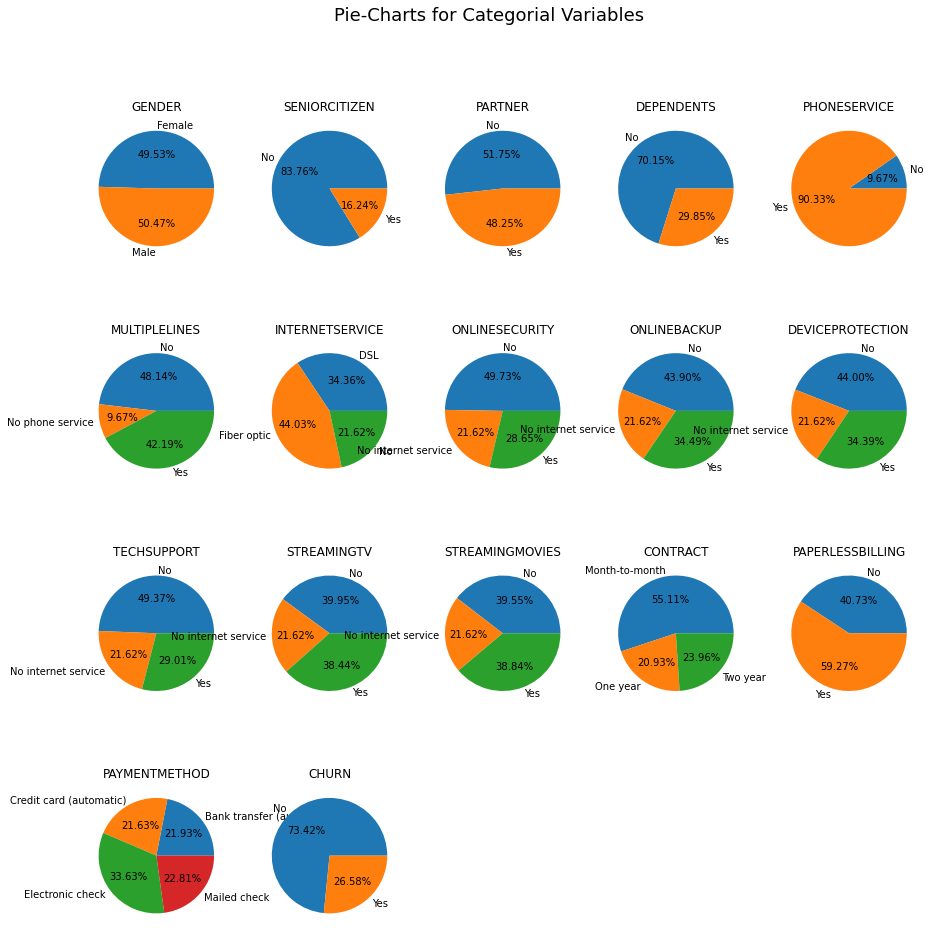



Further it seems that 'No Phone Service' in 'Multiplelines' Feature has no significance, hence can be considered as 'No'.
Similarly, 'No Internet Service' is aslo insignificant in 'Online Security', 'Online Backup', 'Device Protection',
'Techsupport' , 'StreamingMovies', 'StreamingTV'. Hence they can be changed to 'No'.




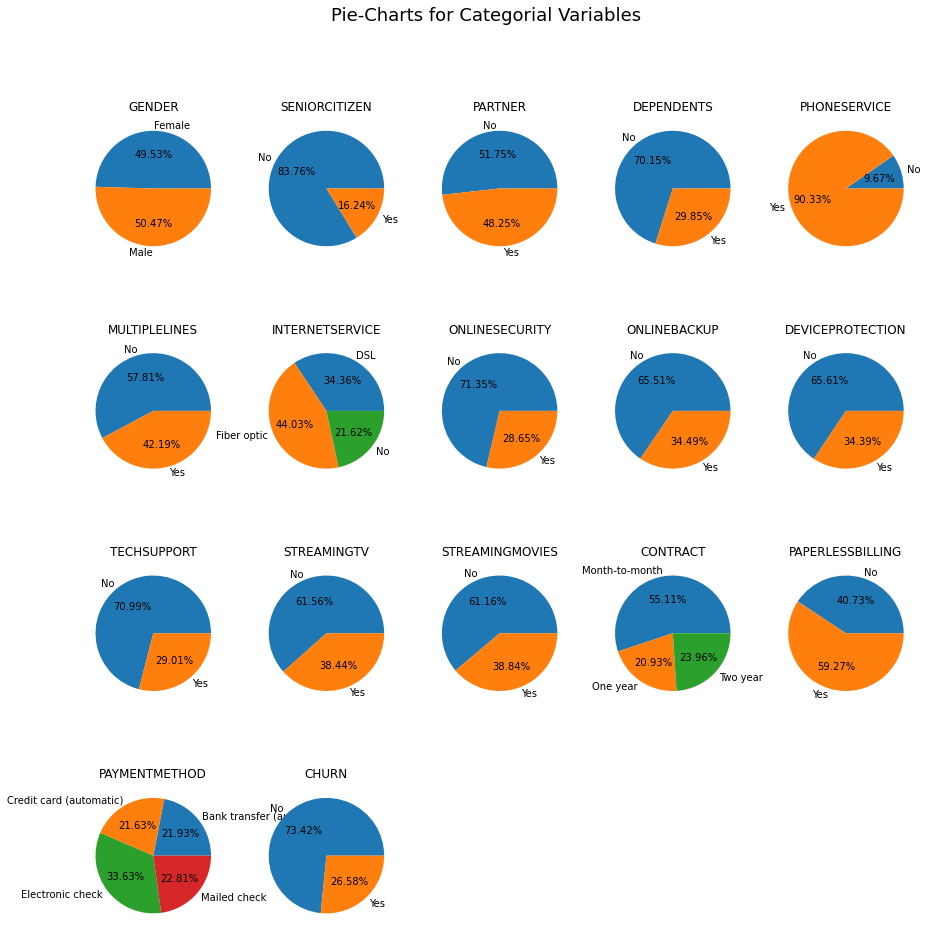



The Target Varaiable is: Churn 

The Details of New Encoded DataFrame after creating Dummy variables. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7032 non-null   uint8  
 1   gender_Male                              7032 non-null   uint8  
 2   SeniorCitizen_No                         7032 non-null   uint8  
 3   SeniorCitizen_Yes                        7032 non-null   uint8  
 4   Partner_No                               7032 non-null   uint8  
 5   Partner_Yes                              7032 non-null   uint8  
 6   Dependents_No                            7032 non-null   uint8  
 7   Dependents_Yes                           7032 non-null   uint8  
 8   PhoneService_No                          7032 non-null   uint8  
 9   PhoneService

,Mean_VA,Min_VA,Max_VA,Train_acc_model,Test_acc_model,Elapsed_Time
Logistic Regression,0.804445,0.782918,0.830961,0.806222,0.798152,0.159008
Naive Bayes,0.752702,0.720641,0.788632,0.753422,0.739872,0.075818
KNN,0.750042,0.731317,0.774021,0.972622,0.732765,0.85289
SVM,0.802494,0.774423,0.839858,0.818311,0.793888,38.023148
Decision Tree,0.791644,0.782918,0.809609,0.792533,0.776119,0.094175
Bagging,0.780978,0.752669,0.813499,0.9776,0.780384,6.842198
Ada Boost,0.800884,0.770463,0.820285,0.808889,0.797441,1.89349
Gradient Boost,0.802844,0.781139,0.83452,0.817956,0.793888,3.095669
Random Forest,0.784172,0.754448,0.815275,0.978311,0.783937,3.02113
XGBoost,0.795374,0.770463,0.818505,0.825422,0.78678,1.270581




From the above DataFrame it is visible that the model which has performed the best is: Logistic Regression 

****************************** Evaluating the Logistic Regression Model ****************************** 

The Accuracy of best model (Logistic Regression) is: 0.7981520966595593
The Elapsed Time to run this model is 0.15901 seconds. 

-------------------------------- Classification Report for this Model -------------------------------- 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

----------------------------------- Confusion Matrix for this Model ----------------------------------- 



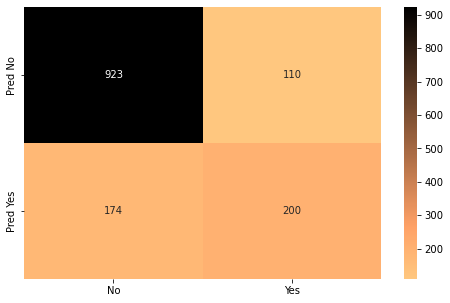

---------------------------------------------- ROC Curve ---------------------------------------------- 



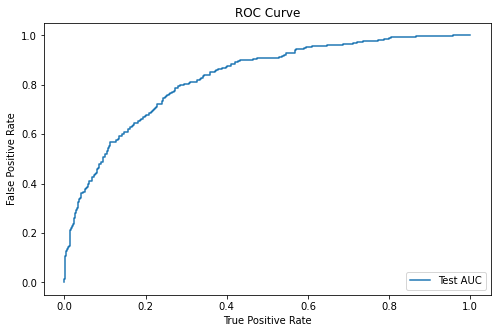

In [39]:
def Main_Fun():
    readfile()
    data_exp_clean()
    mod_build()
    mod_eval()
    return

Main_Fun()